# Machine Learning
## LAB 10 - Unsupervised learning algorithms - Part II

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import time, warnings
import numpy as np

from sklearn import  datasets
from sklearn.datasets import make_blobs
from sklearn import cluster
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from itertools import cycle, islice

##### Dataset:
##### Create the dataset using make blobs function:

In [2]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

# Dentograms
The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.
# Exercise 1
#### Plot the data.


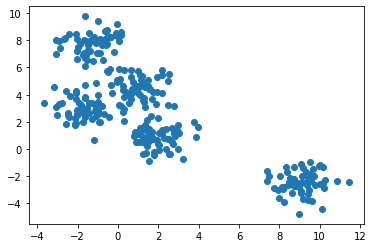

In [3]:
plt.plot(X[:, 0], X[:, 1], 'o')

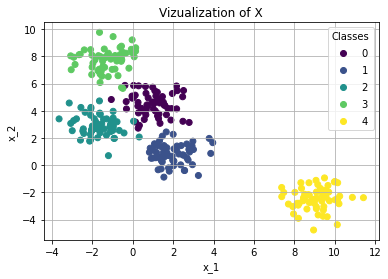

In [4]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

# Exercise 2
#### Use the Means function with k=2 to assign points to clusters.
In Kmeans clustering, we provide the number of clusters and then the algorithm partitions the data. In agglomerative clustering, the data is grouped together based on the distance, and we can decide how many clusters we want, once we see how the data are grouped together.

In [5]:
k_means_2 = KMeans(n_clusters=2)

In [6]:
k_means_2.fit(X)

KMeans(n_clusters=2)

In [7]:
y_pred = k_means_2.predict(X)

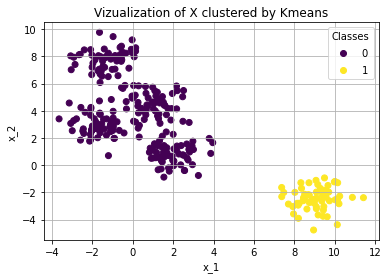

In [8]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X clustered by Kmeans")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

# Exercise 3
#### Use the scipy libraries to draw the dendrogram for the data:


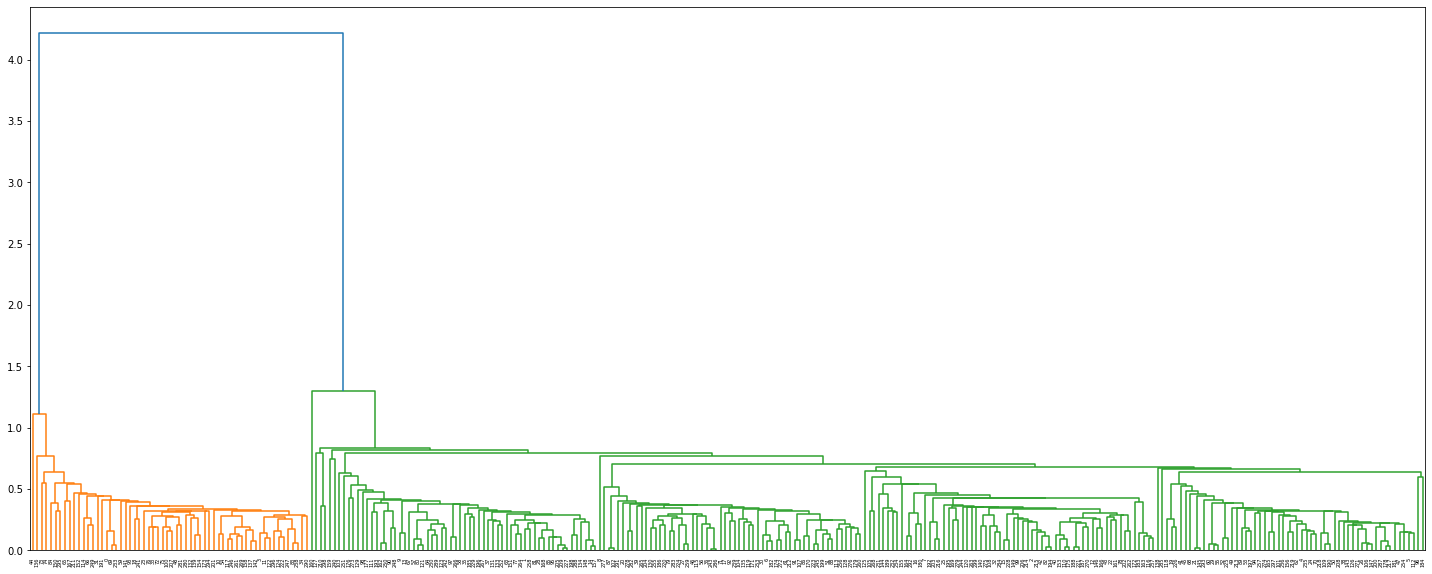

In [9]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

# Exercise 4
#### Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.


In [10]:
X, y_true = make_blobs(n_samples=50, centers=5,
                       cluster_std=0.8, random_state=0)

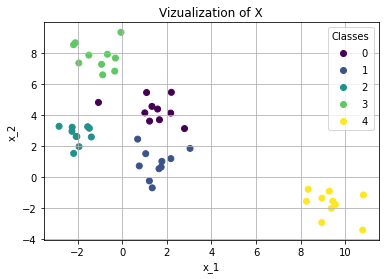

In [11]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

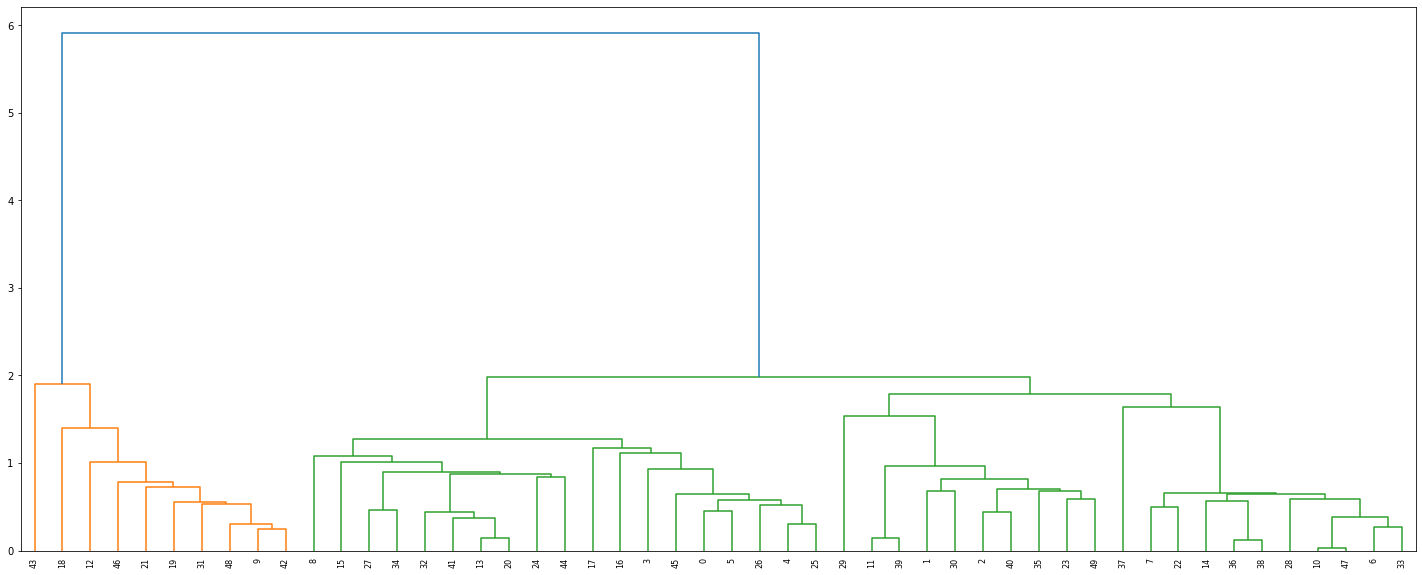

In [12]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

# Agglomerative clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.

There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

In this ex. we will focus on agglomerative clustering.# Exercise 5
#### Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.


In [13]:
shopping_df = pd.read_csv("Lab10_shopping_data.csv")

In [14]:
shopping_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
useful_shopping_df = shopping_df.drop(["CustomerID"], axis="columns")

In [16]:
useful_shopping_df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
X = useful_shopping_df.drop(["Genre", "Age"], axis="columns").values

In [18]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

# Exercise 6
#### Create a dendrogram to chose the appropriate k value.

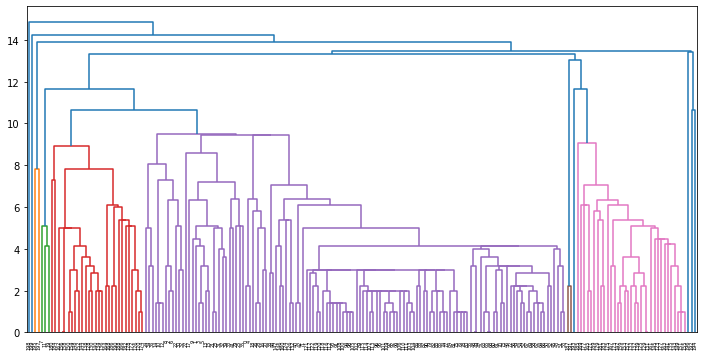

In [19]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(12, 6))
dn = dendrogram(Z)
plt.show()

# Exercise 7
#### Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).)

In [20]:
linkage_methods = ['ward', 'complete', 'average', 'single']

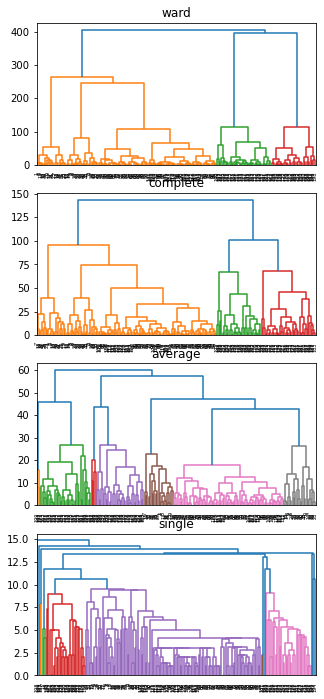

In [21]:
fig, axs = plt.subplots(len(linkage_methods),figsize=(5, 12))

for i in range (len(linkage_methods)):
  Z = linkage(X, linkage_methods[i])
  dn = dendrogram(Z, ax=axs[i])
  axs[i].set_title(linkage_methods[i])
  
plt.show()

# Exercise 8
#### Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.
[source link](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html)
# Exercise 9
#### Plot the clusters to see how actually our data has been clustered.



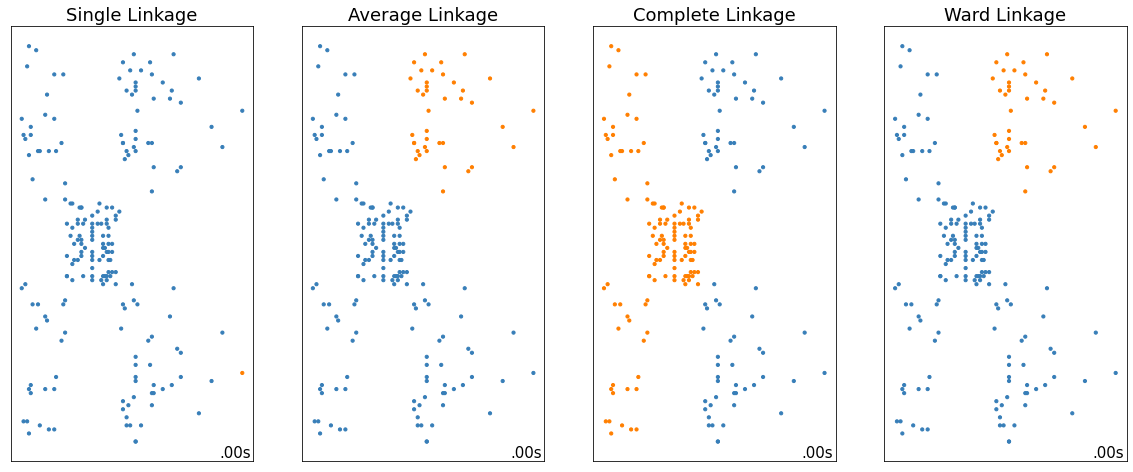

In [22]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# ============
# Create cluster objects
# ============
ward = cluster.AgglomerativeClustering(linkage='ward')
complete = cluster.AgglomerativeClustering(linkage='complete')
average = cluster.AgglomerativeClustering( linkage='average')
single = cluster.AgglomerativeClustering(linkage='single')

clustering_algorithms = (
('Single Linkage', single),
('Average Linkage', average),
('Complete Linkage', complete),
('Ward Linkage', ward),
)

plot_num = 1 
plt.figure(figsize=(20, 8))

for name, algorithm in clustering_algorithms:
  t0 = time.time()

  # catch warnings related to kneighbors_graph
  with warnings.catch_warnings():
      warnings.filterwarnings(
          "ignore",
          message="the number of connected components of the " +
          "connectivity matrix is [0-9]{1,2}" +
          " > 1. Completing it to avoid stopping the tree early.",
          category=UserWarning)
      algorithm.fit(X)

  t1 = time.time()
  if hasattr(algorithm, 'labels_'):
      y_pred = algorithm.labels_.astype(int)
  else:
      y_pred = algorithm.predict(X)

  plt.subplot(1, len(clustering_algorithms), plot_num)
  plt.title(name, size=18)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                        '#f781bf', '#a65628', '#984ea3',
                                        '#999999', '#e41a1c', '#dede00']),
                                int(max(y_pred) + 1))))
  plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
  
  plt.xticks(())
  plt.yticks(())
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
            transform=plt.gca().transAxes, size=15,
            horizontalalignment='right')
  plot_num+=1
plt.show()

# Selecting the number of clusters with silhouette analysis on KMeans clustering
During our last meeting you have used the elbow method to asses the quality of the clusters. Today we will use the silhouette analysis on KMeans clustering to assess the clusters and choose the right k value.
# Exercise 1
#### Create the dataset:

In [23]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

# Exercise 2
#### Determine the cluster range [2,3….]


In [24]:
cluster_range = range(2, 10)

# Exercise 3
#### Iterate for all the values in cluster range:
- Perform k-Means
- Calculate and print the silhouette_score
- Compute the silhouette scores for each samore
- Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot
- Have a look here to check you solution and plot the silhouette

[source link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

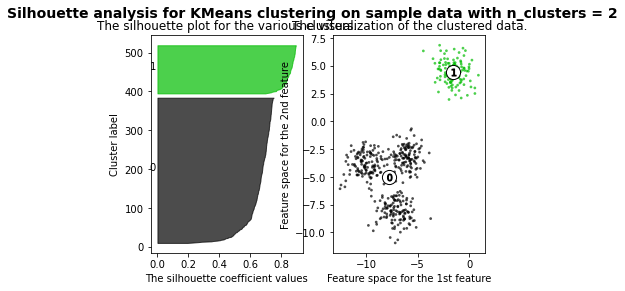

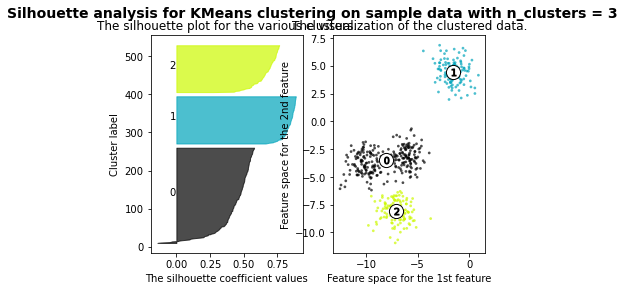

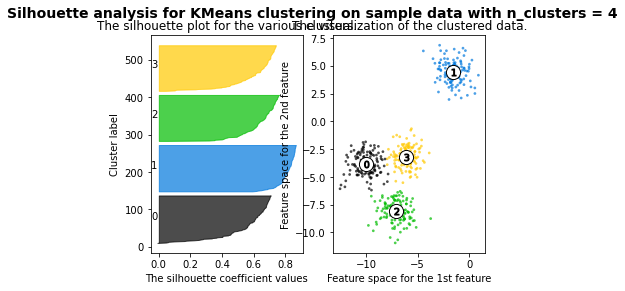

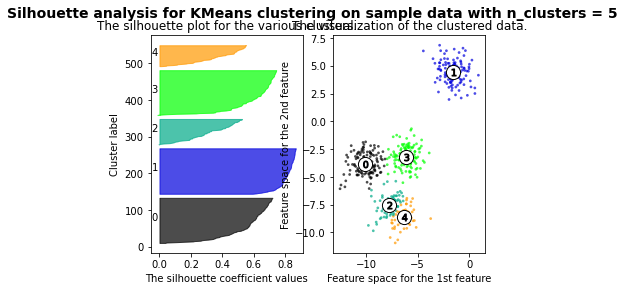

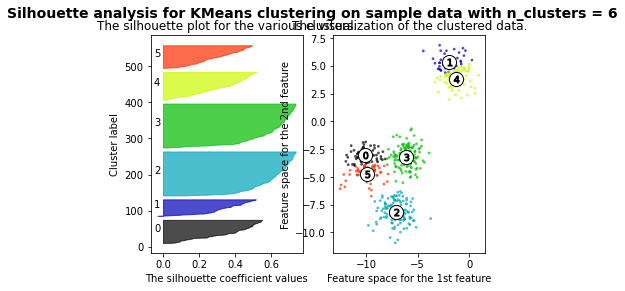

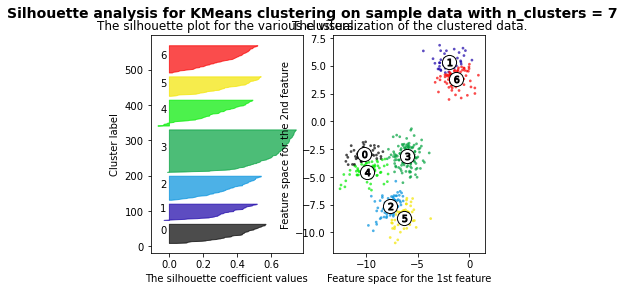

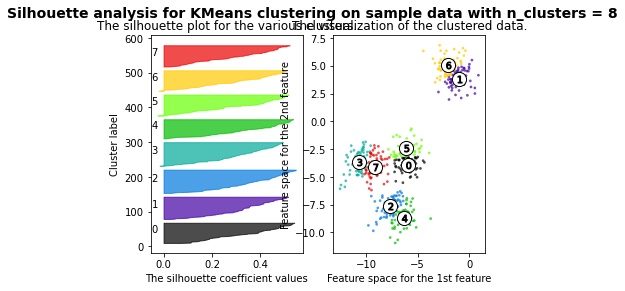

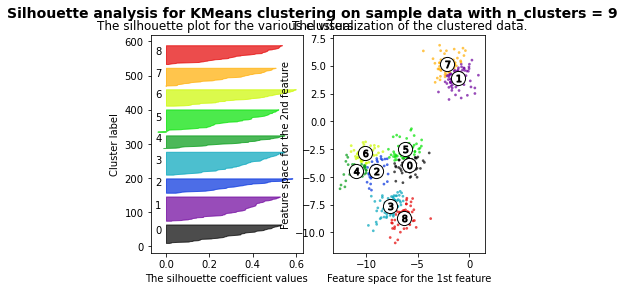

In [25]:
for n_clusters in cluster_range:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  
  k_means = KMeans(n_clusters=n_clusters)
  k_means.fit(X)
  y_pred_kmeans = k_means.predict(X)
  
  silhouette_values = silhouette_samples(X, y_pred_kmeans, metric='euclidean')
  
  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_values[y_pred_kmeans == i]
        
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
                      
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred_kmeans.astype(float) / n_clusters)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')
 # Labeling the clusters
  centers = k_means.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')
              
  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')
                  
  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")
  
  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')


# DBSCAN algorithm
DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density
# Exercise 1
#### Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:


In [26]:
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

## DBSCAN

In [27]:
clustering_dbscan = DBSCAN(min_samples=5).fit(X)

Text(0, 0.5, 'x2')

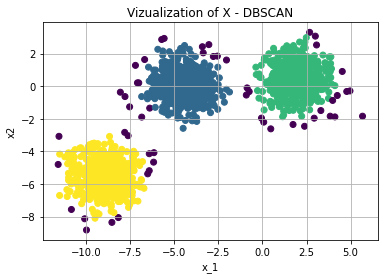

In [28]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=clustering_dbscan.labels_)
plt.title("Vizualization of X - DBSCAN")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x2")


## Agglomerative Clustering

In [29]:
clustering_agglomerative = AgglomerativeClustering(n_clusters=3).fit(X)

Text(0, 0.5, '2')

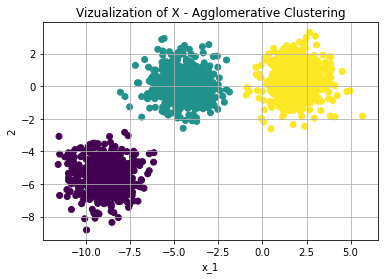

In [30]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=clustering_agglomerative.labels_)
plt.title("Vizualization of X - Agglomerative Clustering")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("2")


## KMeans

In [31]:
k_means = KMeans(init='random', n_clusters=3)
k_means.fit(X)
y_pred_k_means = k_means.predict(X)

Text(0, 0.5, 'x_2')

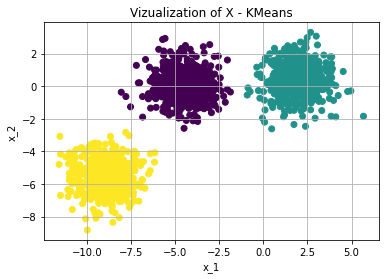

In [32]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_pred_k_means)
plt.title("Vizualization of X - KMeans")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")